## 라이브러리 로딩

In [276]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## 데이터 로딩 및 확인

In [277]:
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [279]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [280]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [281]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


## 결측치 확인 및 처리

In [282]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [283]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [284]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


결측치 처리를 위해 데이터를 합쳐준다.

In [285]:
data = pd.concat([train,test])
data

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0,NaN
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0,NaN


합쳐진 데이터의 결측치를 평균값으로 채워준다.  
이진 분류된 피처는 제외한다.

In [286]:
def fill_nan(df,column) :
    df[column] = df[column].fillna(value = df[column].mean())

In [287]:
fill_nan(data,'hour_bef_temperature')
fill_nan(data,'hour_bef_windspeed')
fill_nan(data,'hour_bef_humidity')
fill_nan(data,'hour_bef_visibility')
fill_nan(data,'hour_bef_ozone')
fill_nan(data,'hour_bef_pm10')
fill_nan(data,'hour_bef_pm2.5')

이진 분류된 피처인 hour_bef_precipitation은 평균값으로 결측치를 채우면 안된다.  
따라서 상태를 살펴보자

In [288]:
data[data['hour_bef_precipitation'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,18.870244,NaN,2.449168,53.690465,1390.179641,0.039824,50.465559,28.517071,39.0
1035,1553,18,18.870244,NaN,2.449168,53.690465,1390.179641,0.039824,50.465559,28.517071,1.0
653,1943,19,18.870244,NaN,2.449168,53.690465,1390.179641,0.039824,50.465559,28.517071,NaN


습도가 52도이고, 대부분의 비 정보는 비가 안오는 경우가 대부분이다.  
hour_bef_precipitation 결측치는 0으로 처리해도 무방할 것 같다.

In [289]:
data['hour_bef_precipitation'] = data['hour_bef_precipitation'].fillna(value=0)

In [290]:
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone              0
hour_bef_pm10               0
hour_bef_pm2.5              0
count                     715
dtype: int64

결측치 처리가 완료되었다. 학습을 위해 다시 데이터를 분리해준다.

In [291]:
train = data[~pd.isnull(data['count'])]
test = data[pd.isnull(data['count'])]

## 상관관계 분석

In [292]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [293]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,0.000311,-0.056401,-0.003323,-0.017885,0.008927,0.053819,-0.024722,0.002380,-0.002131
hour,-0.010901,1.000000,0.406547,0.021708,0.460697,-0.329235,0.176284,0.366750,-0.021796,-0.049928,0.626047
hour_bef_temperature,0.000311,0.406547,1.000000,-0.097144,0.375167,-0.495989,0.197380,0.529742,-0.001719,-0.070894,0.618216
hour_bef_precipitation,-0.056401,0.021708,-0.097144,1.000000,0.022768,0.276456,-0.217143,-0.060317,-0.050218,0.003260,-0.163580
hour_bef_windspeed,-0.003323,0.460697,0.375167,0.022768,1.000000,-0.432741,0.251534,0.510505,0.010558,-0.189828,0.458678
hour_bef_humidity,-0.017885,-0.329235,-0.495989,0.276456,-0.432741,1.000000,-0.592244,-0.410904,-0.106128,0.155584,-0.470857
hour_bef_visibility,0.008927,0.176284,0.197380,-0.217143,0.251534,-0.592244,1.000000,0.098911,-0.387687,-0.609306,0.298885
hour_bef_ozone,0.053819,0.366750,0.529742,-0.060317,0.510505,-0.410904,0.098911,1.000000,0.108333,0.016587,0.467692
hour_bef_pm10,-0.024722,-0.021796,-0.001719,-0.050218,0.010558,-0.106128,-0.387687,0.108333,1.000000,0.475365,-0.106313
hour_bef_pm2.5,0.002380,-0.049928,-0.070894,0.003260,-0.189828,0.155584,-0.609306,0.016587,0.475365,1.000000,-0.125602


<AxesSubplot:>

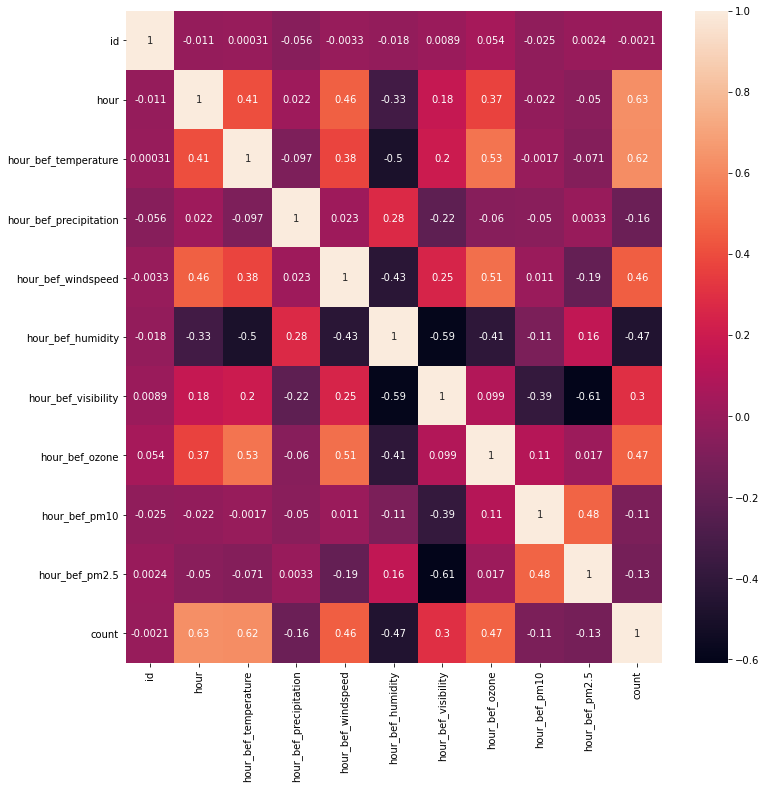

In [294]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

1에 가까울수록 관계가 깊다, 0에 가까울수록 관계가 적다.  
상관성이 있다고 생각되는 데이터를 중점으로 살펴보았다.

In [295]:
train.corr()>=0.3

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,True,False,False,False,False,False,False,False,False,False,False
hour,False,True,True,False,True,False,False,True,False,False,True
hour_bef_temperature,False,True,True,False,True,False,False,True,False,False,True
hour_bef_precipitation,False,False,False,True,False,False,False,False,False,False,False
hour_bef_windspeed,False,True,True,False,True,False,False,True,False,False,True
hour_bef_humidity,False,False,False,False,False,True,False,False,False,False,False
hour_bef_visibility,False,False,False,False,False,False,True,False,False,False,False
hour_bef_ozone,False,True,True,False,True,False,False,True,False,False,True
hour_bef_pm10,False,False,False,False,False,False,False,False,True,True,False
hour_bef_pm2.5,False,False,False,False,False,False,False,False,True,True,False


hour_bef_pm10, hour_bef_pm2.5(1시간 전 미세먼지 데이터)는 자전거 대여량과 큰 상관관계를 보이지 않는 것 같다.  
hour_bef_visibility(1시간 전 시정, 시계) 또한 0.3으로 상관관계가 약한 것으로 파악된다.  
추후 학습 데이터에서 제거한다.

## 분포도

수치형 데이터의 집계 값을 나타낸다,

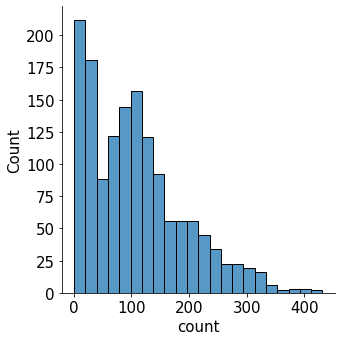

In [296]:
plt.rc('font',size=15)
sns.displot(train['count'])

타겟 값의 분포가 0 근처에 몰려있고 분포가 왼쪽으로 많이 편향되어 있다.  
회귀모델이 좋은 성능을 내려면 정규분포를 따라야 하는데, 현재 타깃값 count는 정규분포를 따르지 않는다.   
로그변환을 통해 왼쪽으로 쏠린 데이터를 바꿔준다.

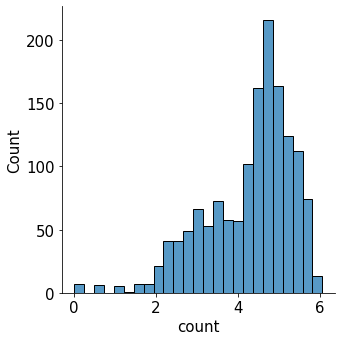

In [297]:
sns.displot(np.log(train['count']))

추후에 지수변환을 통해 타깃값인 count로 복원해야 한다.

### 막대그래프


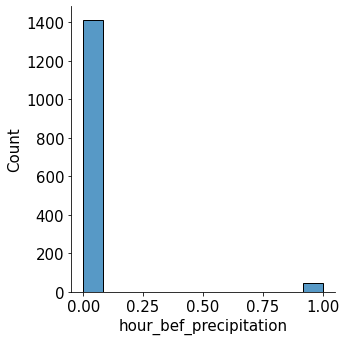

In [298]:
sns.displot(train['hour_bef_precipitation'])

In [299]:
rain = train[train['hour_bef_precipitation']==1]

In [300]:
rain.describe()['count']

count     46.000000
mean      33.673913
std       40.691279
min        1.000000
25%        3.250000
50%       19.500000
75%       44.000000
max      165.000000
Name: count, dtype: float64

In [301]:
train.describe()['count']

count    1459.000000
mean      108.563400
std        82.631733
min         1.000000
25%        37.000000
50%        96.000000
75%       150.000000
max       431.000000
Name: count, dtype: float64

## 회귀선을 포함한 산점도 그래프

수치형 데이터가 대부분이므로 산점도 그래프로 시각화 해보았다.

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='count'>

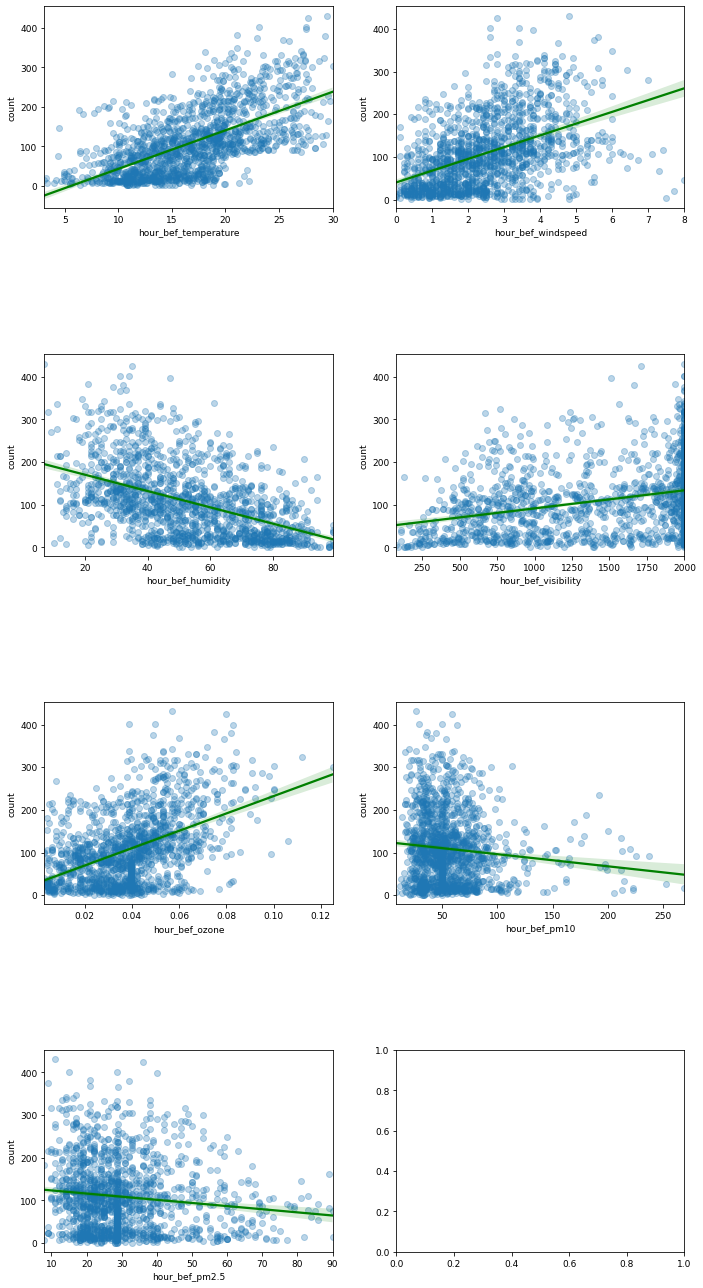

In [302]:
#figure 준비
plt.rc('font',size=9)
figure, axes = plt.subplots(nrows=4,ncols=2)
plt.tight_layout()
figure.set_size_inches(10,20)

#figure 서브플롯에 할당
#기온, 풍속, 습도, 시정, 오존, 미세먼지10, 미세먼지 2.5 산점도 그래프
sns.regplot(x='hour_bef_temperature', y = 'count', data = train, ax = axes[0,0],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})
sns.regplot(x='hour_bef_windspeed', y = 'count', data = train, ax = axes[0,1],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})
sns.regplot(x='hour_bef_humidity', y = 'count', data = train, ax = axes[1,0],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})
sns.regplot(x='hour_bef_visibility', y = 'count', data = train, ax = axes[1,1],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})
sns.regplot(x='hour_bef_ozone', y = 'count', data = train, ax = axes[2,0],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})
sns.regplot(x='hour_bef_pm10', y = 'count', data = train, ax = axes[2,1],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})
sns.regplot(x='hour_bef_pm2.5', y = 'count', data = train, ax = axes[3,0],
           scatter_kws={'alpha':0.3},line_kws={'color':'g'})

결측치가 많이 존재한 이유도 있겠지만 미세먼지의 회귀 그래프는 상관관계가 적어보인다, 추후 제거할 것을 생각해보자

## 정리

1. 타깃값 변환
* 분포도 확인 결과 타깃값 count가 0근처로 치우쳐 있으므로 로그변환해 정규분포에 가깝게 만들어야 한다. 타깃값을 count가 아닌 log(count)로 변환해 사용할 것이므로 마지막에 다시 지수변환해 count로 복원해야 한다.  

2. 피처 제거
* id 피처는 학습에 관계 없으므로 제거한다.
* 미세먼지 피처와 시야 피처는 타겟값과 큰 상관관계가 없고 결측치 비율도 높으므로 제거한다.

## 모델 정의 및 학습

* 모델 : RandomForestRegressor 
* 성능 개선
 * 피처 엔지니어링 : 앞의 분석 수준에서 모든 모델에서 동일하게 수행
 * 하이퍼파라미터 최적화 : grid search
* 기타: 타깃값이 count가 아닌 log(count)임

#### 데이터 합치기

In [303]:
data = pd.concat([train,test])
data

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027000,76.000000,33.000000,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042000,73.000000,40.000000,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033000,32.000000,19.000000,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040000,75.000000,64.000000,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057000,27.000000,11.000000,431.0
...,...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,0.039824,50.465559,28.517071,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,0.039824,50.465559,28.517071,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020000,17.000000,15.000000,NaN
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032000,40.000000,26.000000,NaN


#### 필요없는 피처 제거

In [304]:
#drop_features = ['id','hour_bef_pm10','hour_bef_pm2.5']
drop_features = ['id','hour_bef_pm10','hour_bef_pm2.5','hour_bef_visibility']

data = data.drop(drop_features, axis=1)

In [305]:
data

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,count
0,20,16.3,1.0,1.5,89.0,0.027000,49.0
1,13,20.1,0.0,1.4,48.0,0.042000,159.0
2,6,13.9,0.0,0.7,79.0,0.033000,26.0
3,23,8.1,0.0,2.7,54.0,0.040000,57.0
4,18,29.5,0.0,4.8,7.0,0.057000,431.0
...,...,...,...,...,...,...,...
710,1,24.6,0.0,2.4,60.0,0.039824,NaN
711,1,18.1,0.0,1.0,55.0,0.039824,NaN
712,9,23.3,0.0,2.3,66.0,0.020000,NaN
713,16,27.0,0.0,1.6,46.0,0.032000,NaN


#### 데이터 나누기

In [306]:
#훈련, 테스트 데이터 나누기
X_train = data[~pd.isnull(data['count'])]
X_test = data[pd.isnull(data['count'])]
#카운트 제거
X_train = X_train.drop(['count'],axis=1)
X_test = X_test.drop(['count'],axis=1)
y = train['count'] #타깃값

#### 데이터 스케일링

In [308]:
from sklearn.preprocessing import MinMaxScaler

#ord = ['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed',
#      'hour_bef_humidity','hour_bef_visibility','hour_bef_ozone']
ord = ['hour','hour_bef_temperature','hour_bef_precipitation','hour_bef_windspeed',
      'hour_bef_humidity','hour_bef_ozone']
scaler = MinMaxScaler()
train_scaler = scaler.fit(X_train[ord])
X_train[ord] = scaler.transform(X_train[ord])
X_test[ord] = scaler.transform(X_test[ord])
#X_train_scaled = minmax_scaler.transform(X_train)
#X_test_scaled = minmax_scaler.transform(X_test)

In [309]:
X_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone
0,0.869565,0.490706,1.0,0.1875,0.891304,0.196721
1,0.565217,0.631970,0.0,0.1750,0.445652,0.319672
2,0.260870,0.401487,0.0,0.0875,0.782609,0.245902
3,1.000000,0.185874,0.0,0.3375,0.510870,0.303279
4,0.782609,0.981413,0.0,0.6000,0.000000,0.442623


In [310]:
X_test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone
0,0.304348,0.654275,0.0,0.1625,0.597826,0.311475
1,0.739130,1.000000,0.0,0.6750,0.282609,0.475410
2,0.565217,0.591078,1.0,0.2625,0.956522,0.139344
3,0.260870,0.721190,0.0,0.3125,0.576087,0.196721
4,0.956522,0.427509,1.0,0.4250,0.934783,0.311475


## 모델 훈련 및 저장

In [319]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#모델 생성
randomforest_model = RandomForestRegressor()

#그리드서치 객체 생성
rf_params = {'random_state':[42],
             'n_estimators':[100,120],
             'max_depth':[32,64],
             'min_samples_leaf':[1,6],
             'min_samples_split':[2,8]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model, 
                                              param_grid = rf_params,  
                                              cv=5)

#그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train,log_y)
print('최적의 하이퍼 파라미터',gridsearch_random_forest_model.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(gridsearch_random_forest_model.best_score_))

최적의 하이퍼 파라미터 {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
GridSearchCV 최고 정확도:0.7537


In [320]:
randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)
submission['count'] = np.exp(randomforest_preds) #지수변환
submission

,id,count
0,0,80.812175
1,1,215.202195
2,2,37.522748
3,4,25.193066
4,5,25.418202
...,...,...
710,2148,57.155834
711,2149,62.096125
712,2165,118.403908
713,2166,117.017615


In [321]:
submission.to_csv('0926.csv',index = False)
#46.453